- 생각
    - 모델링 자체로는 우리가 약세일 수 있다.
        - 임직원의 강점이 데이터 분석 자체에서도 드러나야 함
        - 1) 모델링도 평타 이상은 되어야함
            - 최소 딥러닝
            - GNN 다시 할 수 있을까? (지수 누나)
            - 아니면 segmentation
        - 2) 데이터분석
            - 하나은행 게시판 등을 통해 아이디어들 생각해보자..
            - 동기님 의견
    - Visualization
        - plotly, tableau 동기님 리액트로 띄울 수 있을까?
    - 퇴직연금
        - 자체에 대한 이해도가 부족해보이면 안된다
        - 차별성을 강하게 가져갈 수는 없을까..?
    - 데이터셋
        - 임의로 구성하는 수준이긴 하지만 최소한의 근거는 확실히 필요하다


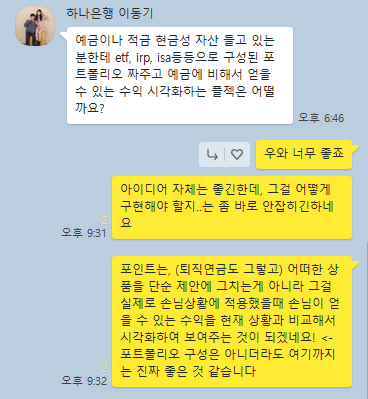

## 0. Settings
- This is for contest submission
    - http://kbdatory.com/notice/list
- Data source, References
    - Analysis : https://www.kaggle.com/code/varunsaikanuri/bank-term-deposit-marketing-analysis
    - Segmentatation : https://www.kaggle.com/code/psycon/bank-customer-segmentation
    - Classification Modelings : https://www.kaggle.com/code/goldens/classification-review-with-python
- About Dataset?
    - Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

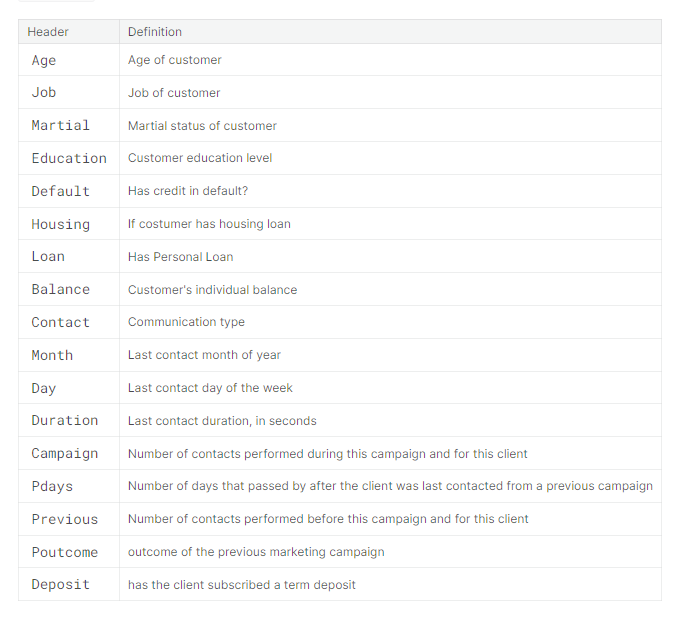

In [42]:
pip install chart-studio

In [43]:
pip install squarify

## 1. Load Data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from chart_studio import plotly
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data_path = '/content/drive/MyDrive/Colab Notebooks/KB_AI/data/'
df = pd.read_csv(data_path +'bank.csv')
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [45]:
df.info() # 결측치는 없고, 범주형 꽤 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## 2. EDA

In [46]:
# plotly 사용을 위한 라이브러리 import
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go

### 2-1. 범주형 변수
- 변수에 따라 그냥 막대가 나을지, pie chart가 나을지 판단할 수 있음
- 일반적으로 한번에 범주형 변수 간단하게 그리는 코드 생각해두면 좋다

In [49]:
continuous_feat = []
categorical_feat = []

for col in df.columns :
    if df[col].dtype == object :
        categorical_feat.append(col)
        print(df[col].value_counts(),'\n')
    else :
        continuous_feat.append(col)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64 

no     10994
yes      168
Name: default, dtype: int64 

no     5881
yes    5281
Name: housing, dtype: int64 

no     9702
yes    1460
Name: loan, dtype: int64 

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64 

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64 

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64 

no     5873
y

In [50]:
print(continuous_feat,'\n')
print(categorical_feat)
print(df[categorical_feat].nunique())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64


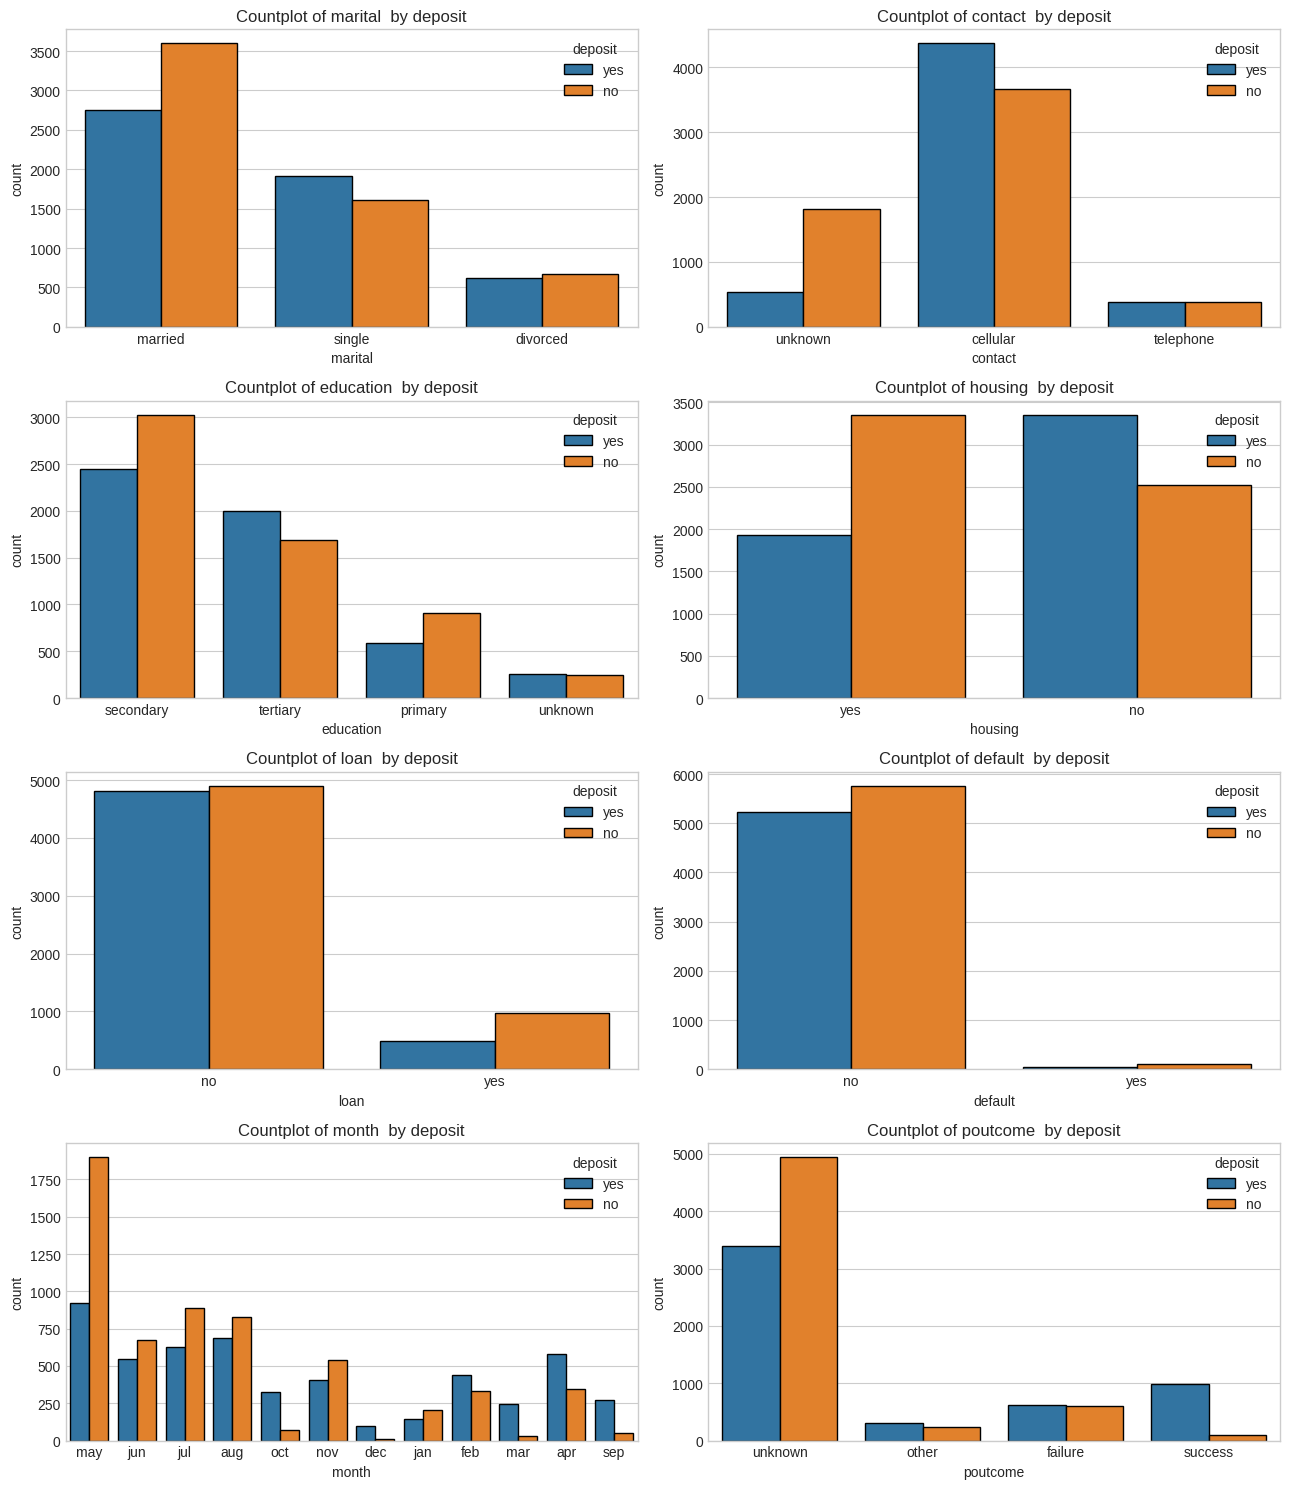

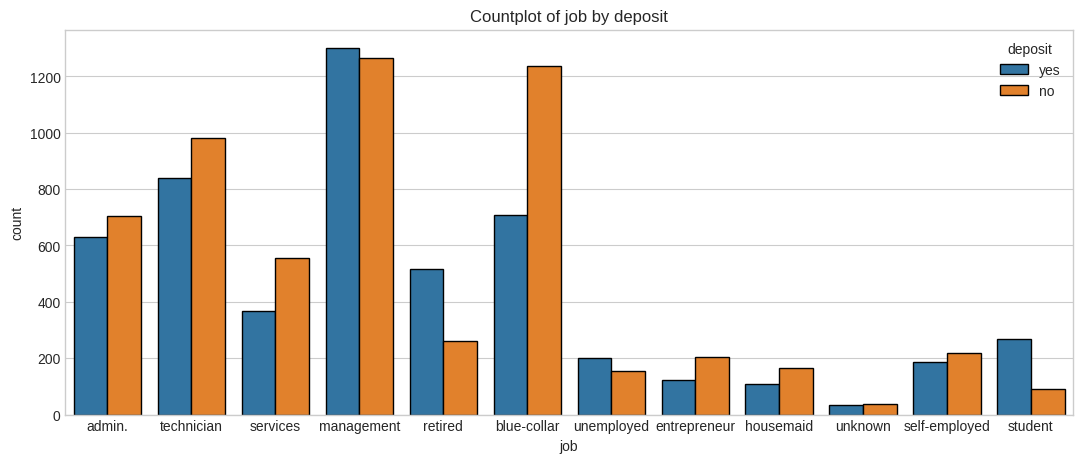

In [51]:
##### subplot들 들어갈 하나의 도화지 #####
size = (13,15)
height = 4
width = 2
target_col = 'deposit'
categorical_feat = list(set(categorical_feat) - set(["deposit","job"])) # job은 종류가 많아서 별도 분석위함이고, deposit은 target 이니까

plt.figure(figsize=size)
for i, col in enumerate(categorical_feat):
    plt.subplot(height, width, i+1)
    sns.countplot(x=col, hue = target_col, data=df,edgecolor="black") # edgecolor 해주는게 훨 이쁘다
    plt.title("Countplot of {}  by deposit".format(col))
plt.tight_layout() # 자동 레이아웃 설정
plt.show()
##### ----------------------------- #####

# job은 종류가 많아서 따로 그림
size = (13,5)
plt.figure(figsize=size)
sns.countplot(x='job', hue='deposit', data=df,edgecolor="black")
plt.title("Countplot of job by deposit")
plt.show()

In [52]:
# admin, management는 같은거니까 통일필요
# 직업 미상에 대해서는 삭제필요
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [53]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index':'Job','job':'Count'}),x='Job',y='Count',color='Job',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

fig.show(renderer="colab") # 이걸해줘야 colab에서도 plotly가 바로 보임

In [54]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Last Contact Month of the year',font_family="Times New Roman",title_font_family="Times New Roman")

fig.show(renderer="colab") # 이걸해줘야 colab에서도 plotly가 바로 보임

In [55]:
fig=px.bar(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),x='Education',y='Count',color='Education',text='Count',template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,legend_title_text='<b>Education',title_text='<b>Education of the customers',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show(renderer="colab") # 이걸해줘야 colab에서도 plotly가 바로 보임

fig=px.pie(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),names='Education',values='Count',hole=0.5,template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Education')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

fig.show(renderer="colab") # 이걸해줘야 colab에서도 plotly가 바로 보임

In [56]:
fig=px.pie(df.marital.value_counts().reset_index().rename(columns={'index':'Marital-Status','marital':'Count'}),names='Marital-Status',values='Count',hole=0.5,template='plotly_white',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

fig.show(renderer="colab") # 이걸해줘야 colab에서도 plotly가 바로 보임

In [57]:
fig=go.Figure()
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Credit in Default', 'Housing Loan','Personal Loan'))
fig.add_trace(go.Pie(values=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Count'],labels=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Default'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Has Credit in Default?',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Count'],labels=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Housing'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Housing Loan',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Count'],labels=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Loan'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Personal Loan',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text=" ",title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

fig.show(renderer="colab")

In [58]:
fig=px.pie(df.contact.value_counts().reset_index().rename(columns={'index':'Contact','contact':'Count'}),names='Contact',values='Count',hole=0.5,template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Contact')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show(renderer='colab')

#### 2-2-1. 직업에 대한 심층분석

In [59]:
a=df.groupby(['job'],as_index=False)['balance'].mean()
a['balance']=round(a['balance'],1)
fig=px.bar(a.sort_values(by='balance',ascending=False),x='job',y='balance',text='balance',color='job',template='ggplot2')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Average balance of the clients by their job type',legend_title_text='Job Type',font_family="Times New Roman",title_font_family="Times New Roman")

fig.show(renderer='colab')

In [60]:
fig=px.box(df,x='job',y='age',color='job',template='simple_white',title='<b>Distribution of age based on job type')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Job type")

fig.show(renderer='colab')

#### 2-2-2. 종속변수에 대한 심층분석

Insight📊:

- The median duration of the clients who subscribed for the term deposit is 426.
- The median duration of the clients who are not subscribed for the term deposit is 163.
- It is clear, that the duration is highly affecting the target variable.

In [61]:
fig=px.box(df,x='deposit',y='duration',color='deposit',template='simple_white',color_discrete_sequence=['YellowGreen','LightCoral'],title='<b>Effect of Duration on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

fig.show(renderer='colab')

Insight📊:

- if the duration is above average then 77.4 % of clients are subscribed to term deposits and 22.6 % are not subscribed
- if the duration is below average then 31.6 % of clients are subscribed to term deposits and 68.4 % are not subscribed

In [62]:
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')

fig.show(renderer='colab')

In [63]:
a=df.groupby(['job','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('job')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='job',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Term Depositors based on Job Type</b>',font_family="Times New Roman",title_font_family="Times New Roman")

fig.show(renderer='colab')

In [64]:
# 정기예금 가입여부에 대한 job 별 treemap
fig=px.treemap(df.groupby(['job','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),path=['job','deposit','Count'],template='simple_white')
fig.update_layout(title_x=0.5,template='simple_white',title_text='<b style="color:black; font-size:100%;">Treemap on count of clients who subscribed the Term Deposits or not based on Job',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show(renderer='colab')

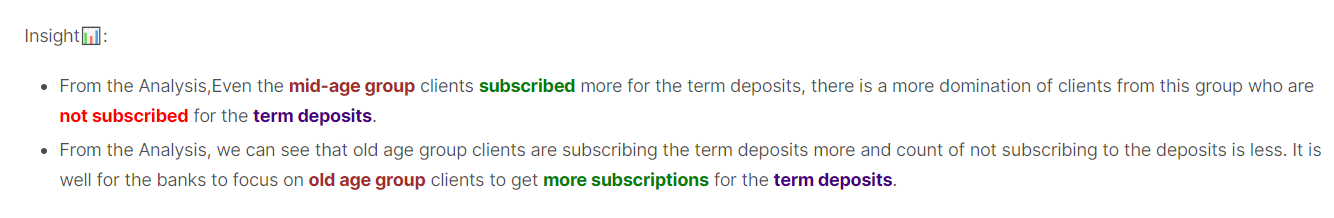

In [65]:
fig=px.line(df.groupby(['age','deposit'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='deposit',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Age on Term Deposits')
fig.add_annotation(
  x=55,  # arrows' head
  y=165,  # arrows' head
  ax=60,  # arrows' tail
  ay=200,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='Even <b style="color: Brown;">mid-age group</b> clients <b style="color: green;">subscribed</b> more for the term deposits,<br>     there is a more domination of clients from this group who are <br><b style="color: red;">not subscribed</b> for the <b style="color: Indigo;">term deposits</b>.',  # if you want only the arrow
  showarrow=True,
  arrowhead=3,
  arrowsize=1,
  arrowwidth=1,
  arrowcolor='black'
)
fig.add_annotation(
  x=75,  # arrows' head
  y=30,  # arrows' head
  ax=80,  # arrows' tail
  ay=65,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='<b style="color: Brown;">old age group</b> clients are <b style="color: Green;">subscribing</b> the <b style="color: Indigo;">term deposits</b> more<br> and count of <b style="color: red;">not subscribing</b> to the deposits is <b style="color: Green;">less</b>.',  # if you want only the arrow
  showarrow=True,
  arrowhead=3,
  arrowsize=1,
  arrowwidth=1,
  arrowcolor='black'
)
fig.show(renderder='colab')

### 2-2. 수치형 변수

In [47]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<ipython-input-48-2d8abb2c390b>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



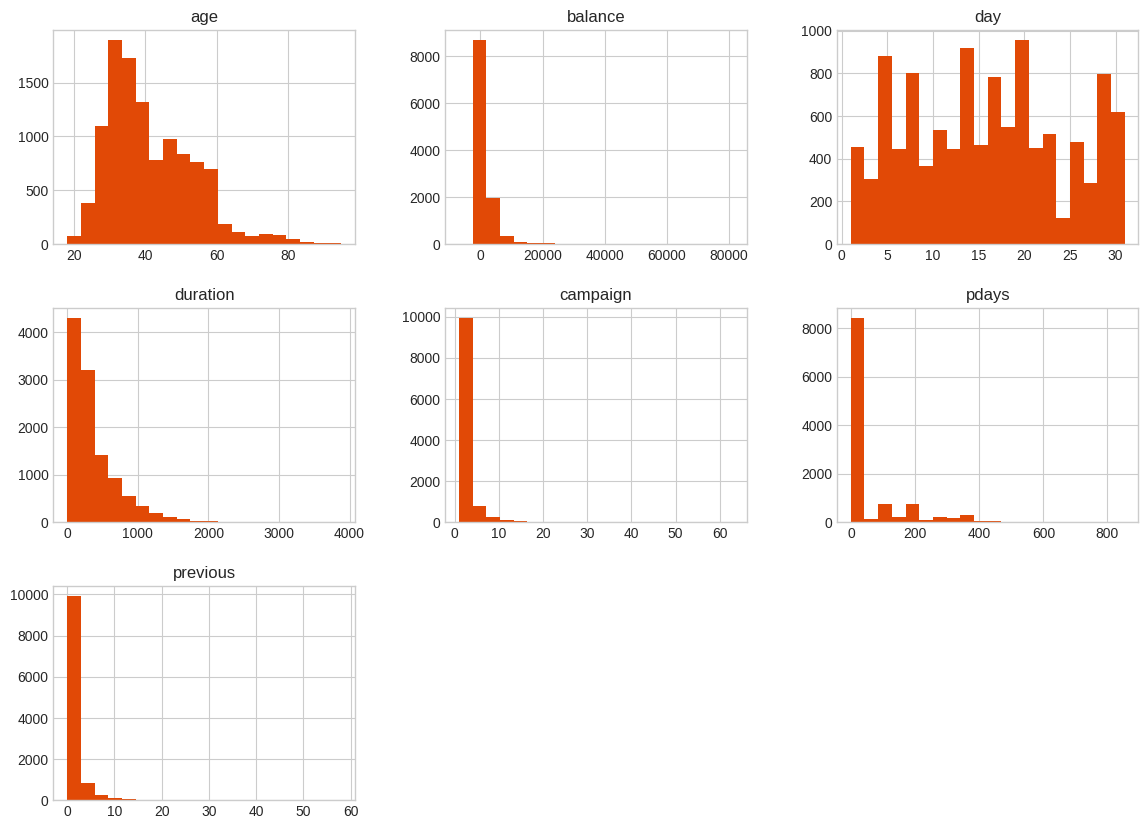

In [48]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

이상치 파악
- 그냥 무조건 지우는게 아니라 데이터 분석을 통해서 제거해도 되는 경우에 없애야 함

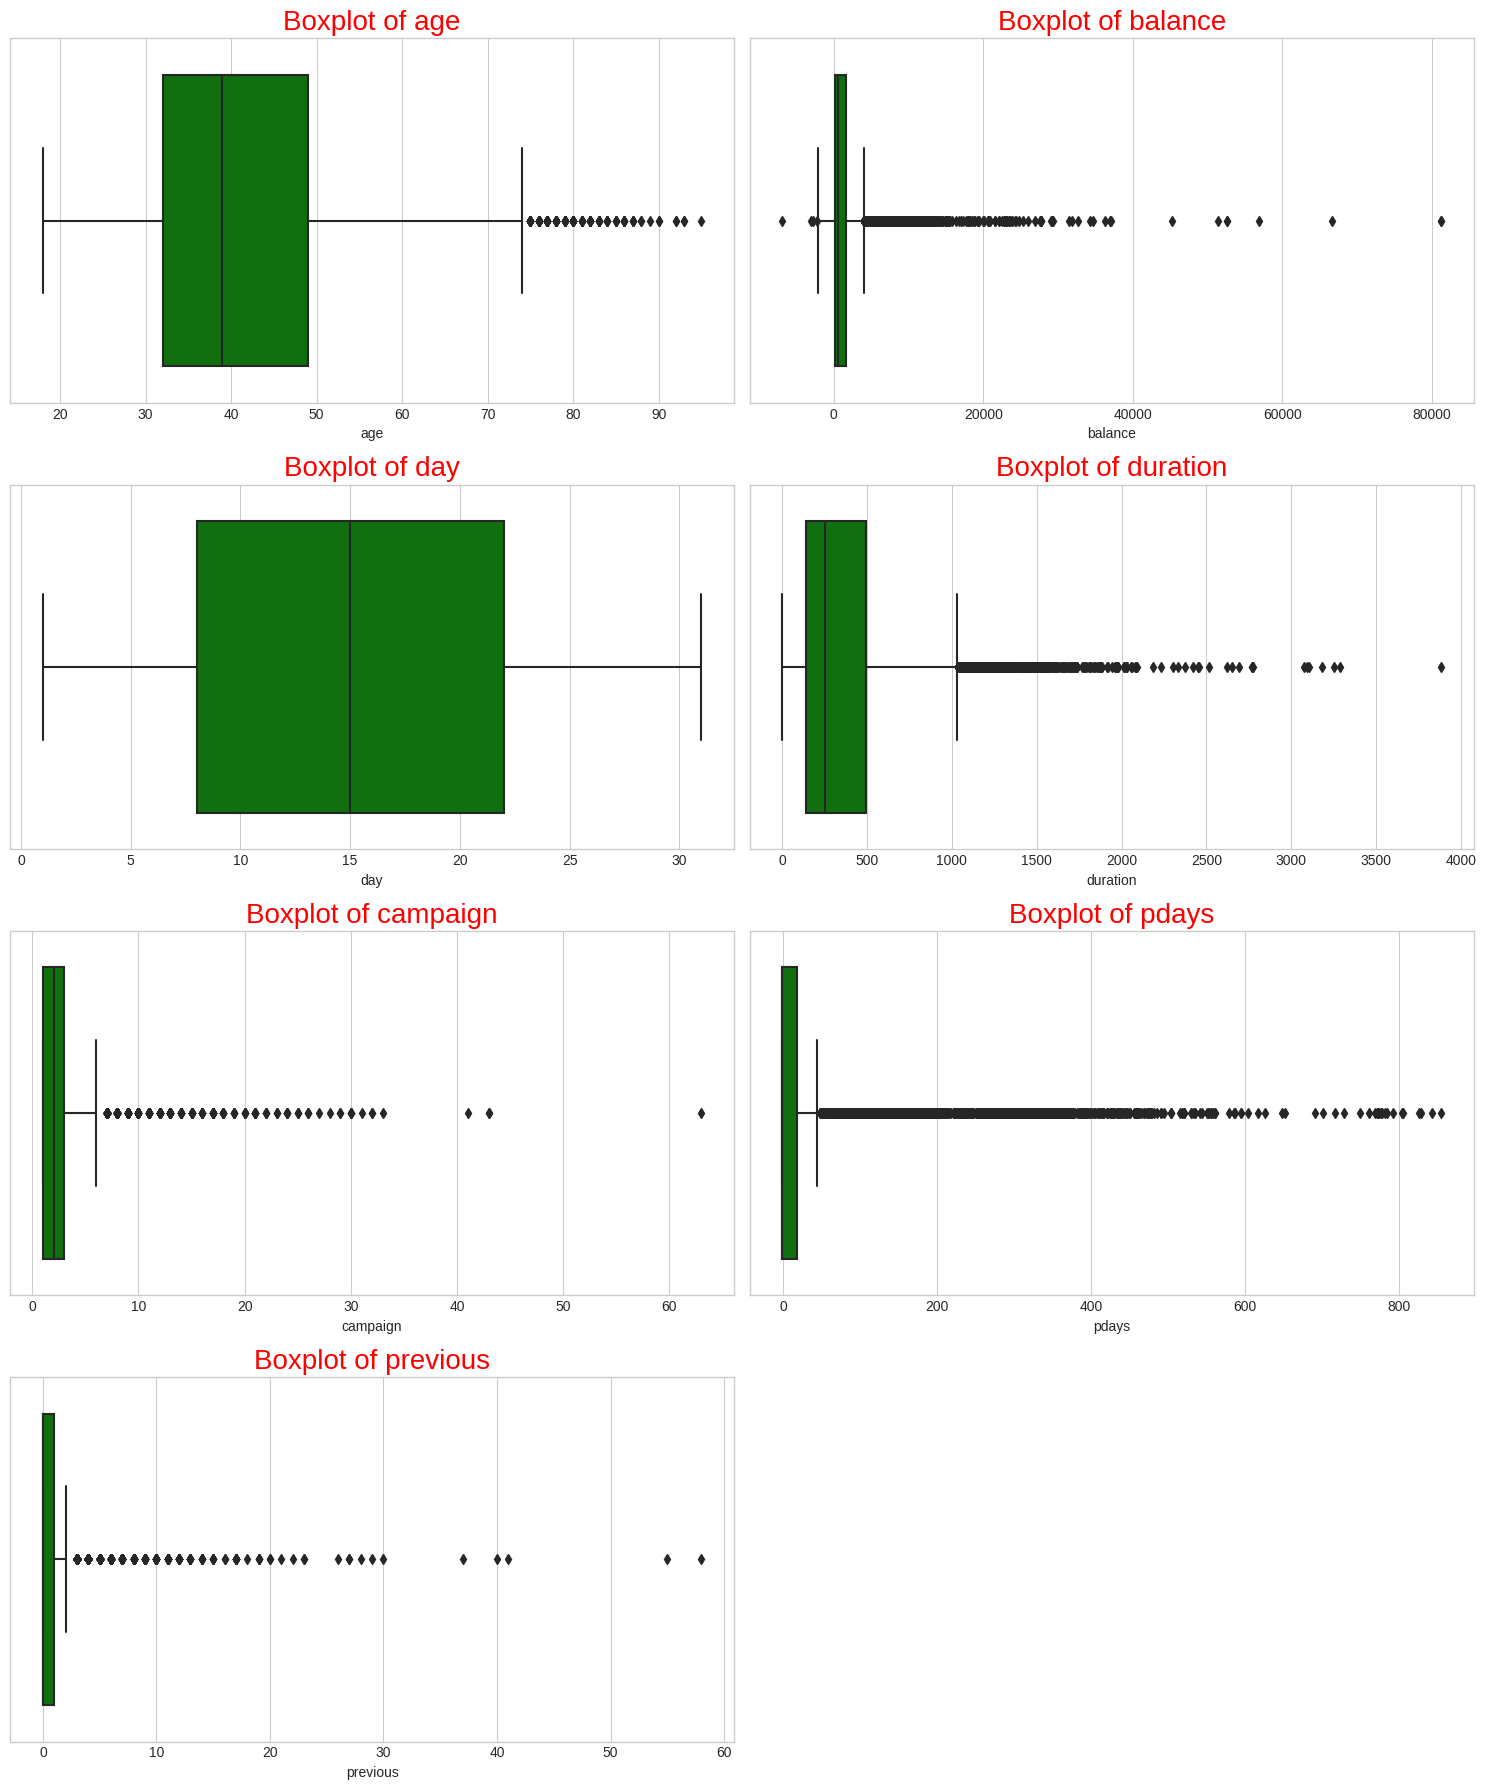

In [71]:
plt.figure(figsize=(15,18))
for i, col in enumerate(continuous_feat) :
    plt.subplot(4,2,i+1)
    sns.boxplot(x=col, data=df[continuous_feat], color='green')
    plt.title("Boxplot of {}".format(col),size=20,color="red")
plt.tight_layout()
plt.show()

## 3. Conclusion based on EDA

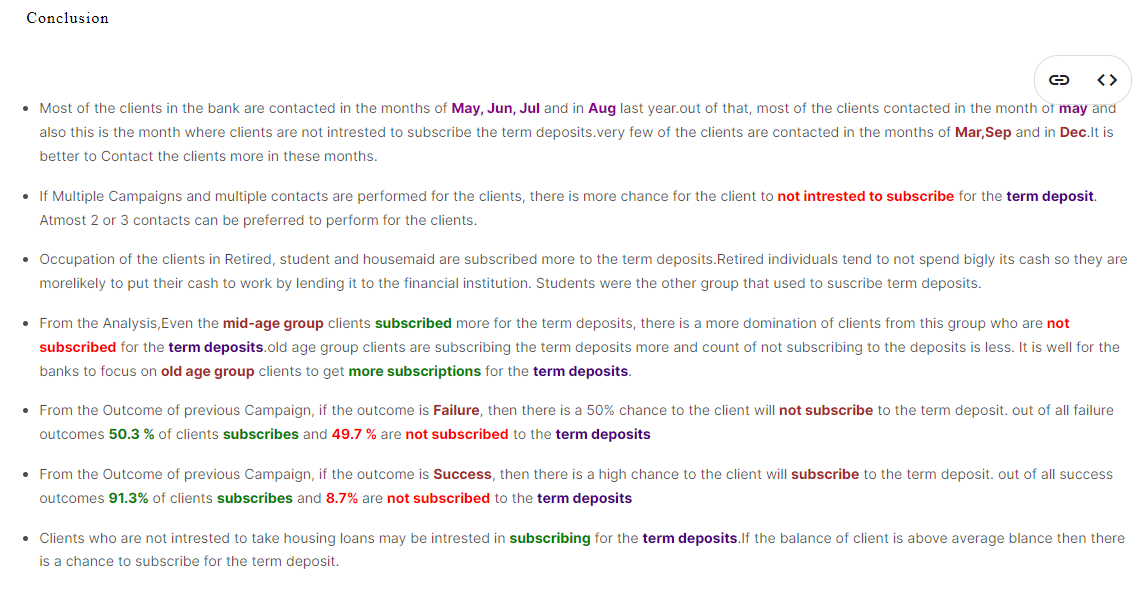